# Cual juego es exitoso?

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

In [232]:
#importo librerias
from scipy import stats as st
import math as mt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [233]:
#cargo los datos de Juegos
games = pd.read_csv("games.csv")
games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [234]:
#muestra del dataframe
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# procedemos a la limpieza de la tabla de datos

In [235]:
#cambio los nombres de las columnas a aminusculas
games = games.rename(columns={
    'Name': 'name',
    'Platform': 'platform',
    'Genre': 'genre',
    'Year_of_Release': 'year_of_release',
    'NA_sales': 'na_sales',
    'EU_sales': 'eu_sales',
    'JP_sales': 'jp_sales',
    'Other_sales': 'other_sales',
    'Critic_Score': 'critic_score',
    'User_Score': 'user_score',
    'Rating': 'rating'
})
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [236]:

#valores unicos de user_core
user_score_unique = games['user_score'].unique()
print(user_score_unique)
tbd = games[games['user_score'] == 'tbd']
no_tbd = games[games['user_score'] != 'tbd']

# convertir columan de user score a float en no tbd, no es realmente importante ahora lo guardo por si es nesesario despues
no_tbd['user_score'] = no_tbd['user_score'].astype(float)

# media y mediana user_acore
no_tbd_mean = no_tbd['user_score'].mean()
no_tbd_median = no_tbd['user_score'].median()
print('media y mediana de user_score')
print(no_tbd_mean)
print(no_tbd_median)

#media y mediana critic_score
critic_mean = games['critic_score'].mean()
critic_median = games['critic_score'].median()
print('media y media de critic_score')
print(critic_mean)
print(critic_median)



['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
media y mediana de user_score
7.125046113306984
7.5
media y media de critic_score
68.96767850559173
71.0


C:\Users\supercash\AppData\Local\Temp\ipykernel_16988\3816266810.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_tbd['user_score'] = no_tbd['user_score'].astype(float)


In [237]:
#valores unicos de year_release
year_unique = games['year_of_release'].dropna().unique()
year_unique.sort()

#valores unicos de platform
platform_unique = games['platform'].unique()
print(platform_unique)

do = games[games['platform'] == 'PC'] #cambiando esta parte varias veses averigue cuales consolas tenian juegos con año de lanzamiento faltante
do_null = do[do['year_of_release'].isna()]
do.info()
do_null.sample(17)





['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
<class 'pandas.core.frame.DataFrame'>
Index: 974 entries, 85 to 16705
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             974 non-null    object 
 1   platform         974 non-null    object 
 2   year_of_release  957 non-null    float64
 3   genre            974 non-null    object 
 4   na_sales         974 non-null    float64
 5   eu_sales         974 non-null    float64
 6   jp_sales         974 non-null    float64
 7   other_sales      974 non-null    float64
 8   critic_score     715 non-null    float64
 9   user_score       819 non-null    object 
 10  rating           774 non-null    object 
dtypes: float64(6), object(5)
memory usage: 91.3+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13781,GRID,PC,NaN,Racing,0.00,0.03,0.0,0.01,87.0,7.9,E
1131,Call of Duty: Black Ops,PC,NaN,Shooter,0.58,0.81,0.0,0.23,81.0,5.2,M
11954,Dead Island: Riptide,PC,NaN,Action,0.00,0.07,0.0,0.01,61.0,6,M
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.0,0.00,86.0,8.2,E10+
4648,TERA,PC,NaN,Role-Playing,0.25,0.12,0.0,0.05,77.0,6.8,M
7735,Test Drive Unlimited 2,PC,NaN,Racing,0.05,0.11,0.0,0.03,72.0,5.7,T
13564,RollerCoaster Tycoon,PC,NaN,Strategy,0.02,0.02,0.0,0.01,NaN,NaN,E
7724,Dead Space 3,PC,NaN,Action,0.02,0.16,0.0,0.02,78.0,6,M
14746,Battle vs. Chess,PC,NaN,Misc,0.00,0.02,0.0,0.00,69.0,5.9,T
6818,BioShock 2,PC,NaN,Shooter,0.02,0.19,0.0,0.04,88.0,8,M


In [238]:
#funcion para rellenar los valores nan con el año de lanzamiento de la consola 
def rellenar_year(row):
    if pd.isna(row['year_of_release']):
        if row['platform'] == 'Wii':
            year = 2006
            return year
        if row['platform'] == 'GB':
            year = 1989
            return year
        if row['platform'] == 'DS':
            year = 2004
            return year
        if row['platform'] == 'X360':
            year = 2005
            return year
        if row['platform'] == 'PS3':
            year = 2006
            return year
        if row['platform'] == 'GBA':
            year = 2001
            return year
        if row['platform'] == '3DS':
            year = 2011
            return year
        if row['platform'] == 'N64':
            year = 1996
            return year
        if row['platform'] == 'PS':
            year = 1994
            return year
        if row['platform'] == '2600':
            year = 1977
            return year
        if row['platform'] == 'PSP':
            year = 2004
            return year
        if row['platform'] == 'GC':
            year = 2001
            return year
        if row['platform'] == 'PSV':
            year = 2011
            return year
        if row['platform'] == 'PC':
            year = 2000
            return year
        if row['platform'] == 'XB':
            year = 2001
            return year
        if row['platform'] == 'PS2':
            year = 2000
            return year
    return row['year_of_release']

#aplico la funcion para rellenar valores
games['year_of_release'] = games.apply(rellenar_year, axis=1)
games['year_of_release'] = games['year_of_release'].astype(int)
games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


En esta parte decidi usar el año de lanzamiento de la consola para la que se lanzo el juego si este presentaba un valor ausente en esa columna

In [239]:
#hay dos filas sin nombre ni genero los rellenare con la palabra unkwon
games['name'] = games['name'].fillna('unknwon')
games['genre'] = games['genre'].fillna('unknwon')
#en la columan de user_score hay un valor llamado tbd significa que no tiene calificaion la cambiare por la media igual que los valores ausentes
games['user_score'] = games['user_score'].replace('tbd', 7.5)
#ahora puedo cambiar el tipo de dato de la colmna user_score
games['user_score'] = games['user_score'].astype(float)
#relleno con las mediana
games['critic_score'] = games['critic_score'].fillna(games['critic_score'].mean().round(1))
games['user_score'] = games['user_score'].fillna(games['user_score'].mean().round(1))
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [240]:
#la columna de rating tiene una peculiaridad y el ESBR, sistema por el cual se clasifican los juegos,
#se invento en el año 1994 por lo que todos los juegos salidos antes de 1994 no tiene clasificacion

#solo por curiosidad veo cuales son los valores unicos de esta columna
rating_unique = games['rating'].unique() 
print(rating_unique)
#funcion para rellenar las columna rating
def rellenar_rating(rat):
    if pd.isna(rat['rating']):
        if rat['year_of_release'] < 1994:
            rating = 'before ESRB'
            return rating
        if rat['year_of_release'] >= 1994:
            rating = 'RP'
            return rating
    return rat['rating']
games['rating'] = games.apply(rellenar_rating, axis=1)
games.info()
games.head()

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,7.2,before ESRB
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,69.0,7.2,RP


In [241]:
# nueva columna con las ventas totales de cada juego
def total(row):
    total_s = row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row ['other_sales']
    return total_s
games['total_sales'] = games.apply(total, axis=1)
games.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,7.2,before ESRB,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,69.0,7.2,RP,31.38


In [242]:
# hay un dato mal me di cuenta mas adelante
games.at[15957,'year_of_release'] = 2007

# ANALISIS DE LOS DATOS 


# Cauntos juegos se vendieron por año?

year_of_release
1977    17
1980     9
1981    46
1982    36
1983    17
1984    14
1985    13
1986    21
1987    16
1988    15
Name: name, dtype: int64

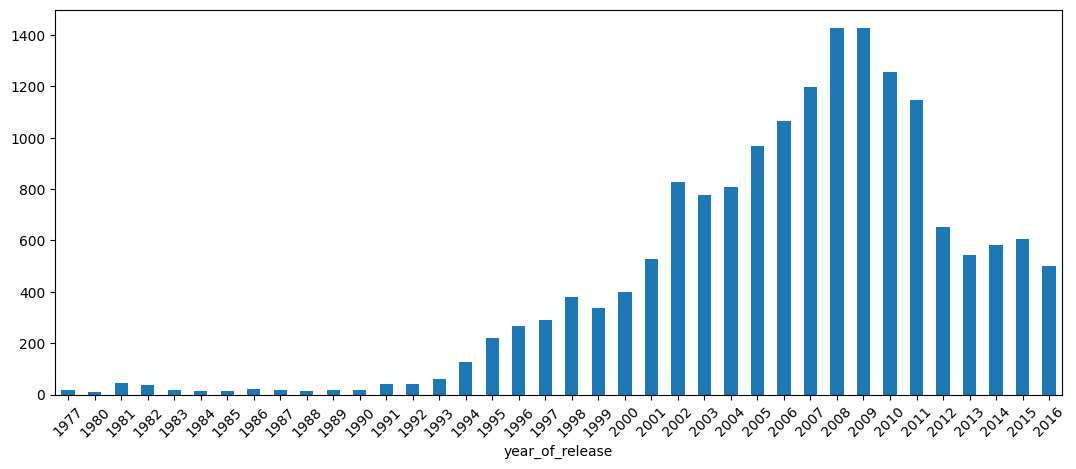

In [243]:
games_year = games.groupby('year_of_release')['name'].count()
games_year.plot(kind='bar', rot=45, figsize=[13, 5])
games_year.head(10)

Es interesante como la cantidad de juegos aumenta cada año hasta el 2008, esto es probablemente por el aumento de su popularidad como medio de entretenimiento, de ahí la cantidad de juegos empieza a bajar probablemente por que con el aumente de la complejidad tomas mas tiempo hacer cada juego.
Como dato curioso hay una bajada en la cantidad de juegos entre 1982 y 1983 esto se debe a ¨La crisis del Videojuego de 1983¨. Mas información https://es.wikipedia.org/wiki/Crisis_del_videojuego_de_1983 


# Ventas de cada consola por año?

Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [244]:
#agrupar por plataforma y año
games_platform_year = games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
games_platform_year = games_platform_year.sort_values(by='year_of_release').reset_index(drop=True)

games_platform = games_platform_year.groupby('platform')['year_of_release'].agg(first_year='min', last_year='max').sort_values(by='first_year').reset_index()

games_platform_year.tail(10)

,platform,year_of_release,total_sales
228,X360,2015,11.96
229,3DS,2016,15.14
230,PC,2016,5.25
231,PS3,2016,3.60
232,PSV,2016,4.25
233,PS4,2016,69.25
234,WiiU,2016,4.60
235,Wii,2016,0.18
236,X360,2016,1.52
237,XOne,2016,26.15


los juegos para consolas XBox360, XBox One, PlayStation 3, PlayStation 4, PlayStation Vita, Wii, Wii U, 3ds y PC son los unicos con ventas 

In [272]:
games_sales = games.groupby('platform')['total_sales'].sum().reset_index()
games_platform_sales = pd.merge(games_platform, games_sales, on='platform', how='outer').sort_values(by='first_year').reset_index(drop=True)
games_platform_sales['duration'] = games_platform_sales['last_year'] - games_platform_sales['first_year']
games_platform_sales.head(31)

,platform,first_year,last_year,total_sales,duration
0,2600,1977,1989,96.98,12
1,NES,1983,1994,251.05,11
2,PC,1985,2016,259.52,31
3,GB,1988,2001,255.46,13
4,GEN,1990,1994,30.77,4
5,SNES,1990,1999,200.04,9
6,GG,1992,1992,0.04,0
7,NG,1993,1996,1.44,3
8,SCD,1993,1994,1.86,1
9,SAT,1994,1999,33.59,5


La plataforma con más ventas es e PlayStation 2 con mas de 1200, entre las plataformas que antes eran populares podemos ver a la Nintendo (NES), la Super Nintendo (SNES), Game Boy, PlayStation, Atari 2600 entre otras, todas las consolas populares tienen una vida de alrededor de 10 años.Por los datos que tenemos podemos intuir que a las consolas que salieron al mercado a partir del 2011  les quedan otros 5 años mas de vida

que datos son relevantes para un modelo para el año 2017?

según los datos a considerar solo nos deberían importar los juegos que han salido en los últimos 5 años pues el la vida media de las consolas que han sido exitosas, en este caso a partir de 2011.



In [246]:
#filtro los datos de los ultimos 10 años
games_relevant_year = games[games['year_of_release'] >= 2011]
# agrupo los datos por platadorma y año
games_relevant_platform = games_relevant_year.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
games_relevant_platform = games_relevant_platform.rename(columns={'year_of_release': 'year'})
games_relevant_platform.head(30)

,platform,year,total_sales
0,3DS,2011,64.39
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78
5,3DS,2016,15.14
6,DS,2011,26.18
7,DS,2012,11.01
8,DS,2013,1.54
9,PC,2011,35.03


In [247]:
games_relevant_platform.tail(30)

,platform,year,total_sales
28,PSP,2013,3.14
29,PSP,2014,0.24
30,PSP,2015,0.12
31,PSV,2011,4.89
32,PSV,2012,16.19
33,PSV,2013,10.59
34,PSV,2014,11.90
35,PSV,2015,6.25
36,PSV,2016,4.25
37,Wii,2011,59.65


aunque las consolas de la anterior generación (DS, PSP, Wii, PS3 y Xbox 360) tienen más ventas, presenta un caída en las ventas año con año, mientras las consolas de la generación más recientes (3DS, PSV, WiiU, PS4 y Xbox one), presentan una aumento año con año en las ventas a excepción del PSV, por lo que para el modelo es mejor concentrarse en la generación mas reciente exceptuando al PSV.

In [248]:
recent = games[games['year_of_release'] >= 2011]
recent.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,69.0,7.2,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,69.0,7.2,RP,14.60


<Axes: xlabel='total_sales'>

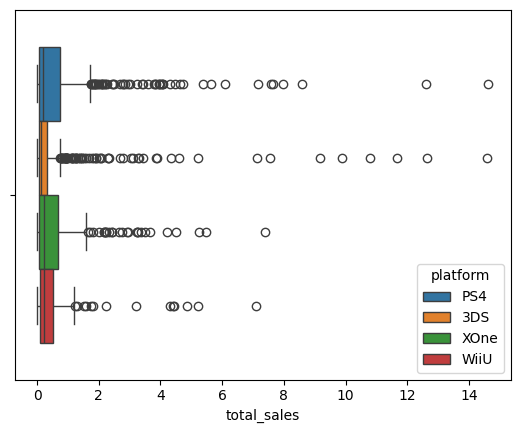

In [249]:
#filtro dataframe segun las consolas dela generacion mas resente excluyendo la psv
generation = ['3DS', 'WiiU', 'PS4', 'XOne']
actual_generation = games[games['platform'].isin(generation)]
actual_generation.head()
sns.boxplot(data=actual_generation, x='total_sales', hue='platform')

# Correlación entre ventas y criticas en Play Station 4

el coeficeinte de correlacion entre las ventas totales y la puntuacion de los usuarios es:
-0.050817381388936926


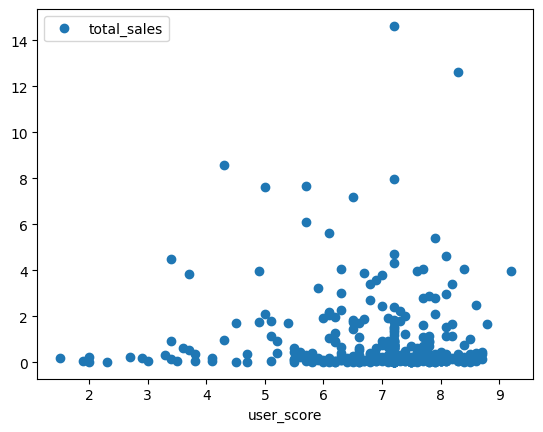

In [250]:
# filtrar por la plataforma ps4
play_station = games[games['platform'] == 'PS4']
play_station.plot(x='user_score', y='total_sales',  style='o')
user_corr = play_station['total_sales'].corr(play_station['user_score'])
print('el coeficeinte de correlacion entre las ventas totales y la puntuacion de los usuarios es:')
print(user_corr)

el coeficeinte de correlacion entre las ventas totales y la puntuacion de la critica es:
0.34887240172175016


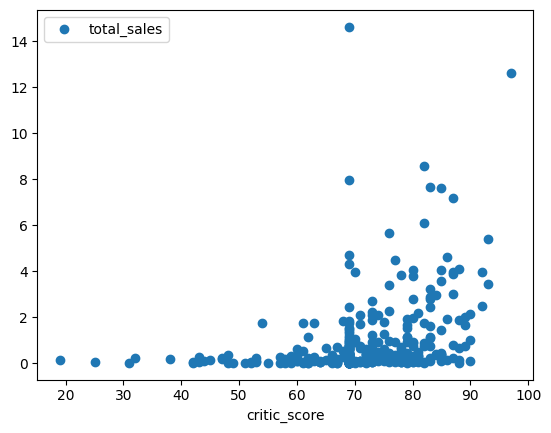

In [251]:
play_station.plot(x='critic_score', y='total_sales', style='o')
critic_corr = play_station['total_sales'].corr(play_station['critic_score'])
print('el coeficeinte de correlacion entre las ventas totales y la puntuacion de la critica es:')
print(critic_corr)

# comparacion mismos juegos en otras consolas

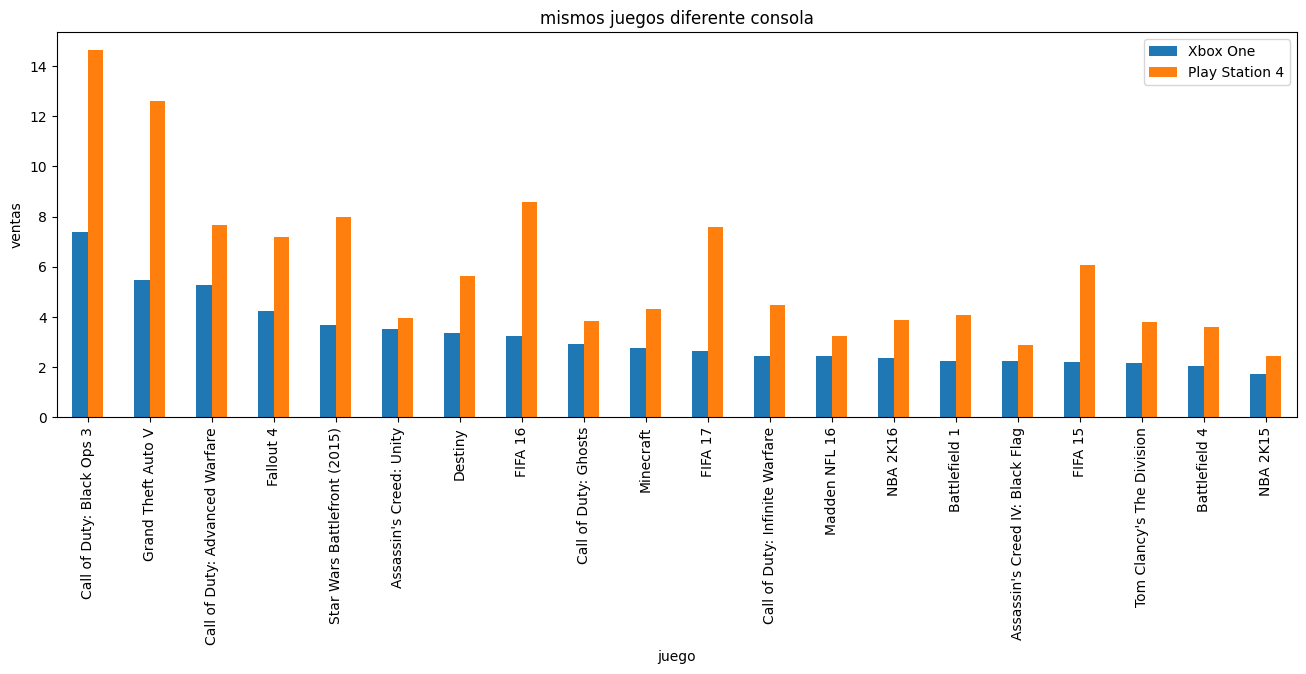

In [252]:
no_play_station = actual_generation[actual_generation['platform'] != 'PS4']
same_games = pd.merge(no_play_station, play_station, on=['name'])
same_games_top = same_games.head(20)
#same_games.head()
same_games_top.plot(kind='bar',
                x='name',
                y=['total_sales_x', 'total_sales_y'],
                title='mismos juegos diferente consola',
                xlabel='juego',
                ylabel='ventas',
                figsize=[16, 5])
plt.legend(['Xbox One', 'Play Station 4'])

# generos y ventas

In [253]:
#cauntos juegos de cada generos hay
genre_count = games.groupby('genre')['name'].count()
genre_count = genre_count.sort_values(ascending=False)
print(genre_count)

genre
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
unknwon            2
Name: name, dtype: int64


In [254]:
#ventas por cada genero
genre_sales = games.groupby('genre')['total_sales'].sum()
genre_sales = genre_sales.sort_values(ascending=False)
print(genre_sales)

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
unknwon            2.42
Name: total_sales, dtype: float64


In [255]:
#ventas promedio de cada genero
genre_sales_mean = games.groupby('genre')['total_sales'].mean()
genre_sales_mean = genre_sales_mean.sort_values(ascending=False)
print(genre_sales_mean)

genre
unknwon         1.210000
Platform        0.932173
Shooter         0.795503
Role-Playing    0.623872
Racing          0.583403
Sports          0.566980
Fighting        0.527126
Action          0.517711
Misc            0.458577
Simulation      0.446701
Puzzle          0.418224
Strategy        0.255095
Adventure       0.182341
Name: total_sales, dtype: float64


(para estos comentario estoy ignorando “unknown”)
Aqui ordene las listas en modo top  para ver cuales cambian dependiendo de numero de juegos, ventas totales y ventas promedio, lo que nos permite ver como cambian de lugar dependiendo de estos factores.

El género ”Action” el líder en ventas y numero de juegos, pero en promedio las ventas de los juegos de este genero quedan a la mitad de la litas, mientras el genero “Shooter” tiene menos de la mitad de juegos que “Action” pero en ventas totales esta en 3er lugar y es segundo en ventas promedio. 

El líder en ventas promedio es “Platform” pero esta legos del primer lugar en las otras listas.

No se puede generalizar en base a las ventas totales, en cada genero hay unos poco juegos o sagas abarcan la mayor parte del mercado esto puede explicar las ventas promedio del genero “platform” gracias a la extensa popularidad de Mario por ejemplo. Y también donde hay muchos juegos pero las ventas de cada uno por no son tan grandes como pasa con los “Action”.



# PERFILES DE USUARIO SEGÚN LA REGION

# preferencia en consola

In [267]:
#plataforma preferida por norte america
na_platform = recent.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
print(na_platform)

platform
X360    226.80
PS3     168.26
PS4     108.74
XOne     93.12
3DS      83.49
Wii      48.56
WiiU     38.10
PC       29.88
DS       18.86
PSV      12.58
PSP       2.19
PS2       0.13
Name: na_sales, dtype: float64


In [268]:
#plataforma preferida po europa
eu_platform = recent.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
print(eu_platform)

platform
PS3     163.10
PS4     141.09
X360    117.10
3DS      61.48
PC       56.70
XOne     51.59
Wii      29.60
WiiU     25.13
PSV      13.12
DS        9.24
PSP       1.77
PS2       0.13
Name: eu_sales, dtype: float64


In [269]:
#plataforma preferida por japon
jp_platform = recent.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
print(jp_platform)

platform
3DS     100.67
PS3      49.39
PSP      24.04
PSV      21.91
PS4      15.96
WiiU     13.01
Wii       8.97
DS        8.04
X360      3.35
XOne      0.34
PS2       0.09
PC        0.00
Name: jp_sales, dtype: float64


Con estos datos podemos ver la preferencia de cada región con respecto a las consolas.

En Norte América aunque hay una preferencia por el Play Stationy y Xbox 360 muy marcada.

En Europa si hay una clara preferencia por la consola de Sony.

Y en Japon el ganador indiscutible es la consola portátil de Nintendo.


# preferencia en generos

In [259]:
#generopreferido por norte america
na_genre = recent.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
print(na_genre)

genre
Action          231.10
Shooter         194.47
Sports          108.70
Role-Playing     83.89
Misc             69.69
Platform         38.28
Racing           32.06
Fighting         31.63
Simulation       15.83
Adventure        14.84
Strategy          7.48
Puzzle            2.74
Name: na_sales, dtype: float64


In [260]:
#genero preferido por europa
eu_genre = recent.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
print(eu_genre)

genre
Action          199.31
Shooter         148.04
Sports           88.48
Role-Playing     62.35
Racing           40.58
Misc             39.72
Platform         30.07
Simulation       19.72
Fighting         16.24
Adventure        13.96
Strategy          8.02
Puzzle            3.56
Name: eu_sales, dtype: float64


In [261]:
#genero preferido por japon
jp_genre = recent.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
print(jp_genre)

genre
Role-Playing    79.97
Action          63.62
Misc            17.60
Fighting        12.38
Platform        12.13
Adventure       12.07
Shooter         11.92
Simulation      11.64
Sports          11.11
Racing           5.64
Strategy         4.78
Puzzle           2.91
Name: jp_sales, dtype: float64


En Norte América y Europa son muy parecidos en lo que respecta a sus 5 generos preferido el 1er lugar es“action” y el 2do es “Shooter” en ambos casos, en el 3er y 4to lugar mientras que el Norte América se lo llevan “Sport” y “Role-Playing”  respectivamente y en el 5to lugar es donde esta la diferencia siendo “Misc” para Norte América y “Racing” para Europa

Japón es muy diferente que las tras dos regiones el 1er lugar es para “Role-Playing”, el 2do es “Action”, el 3er es “Misc”, el 4to “Fighting” y el 5to lugar “Platform”.



# Afecta la clsificacion a las ventas los juegos?


In [262]:
na_rating = recent.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
print(na_rating)

rating
M       308.45
E       170.29
RP      123.97
E10+    117.98
T       109.60
EC        0.42
Name: na_sales, dtype: float64


In [263]:
eu_rating = recent.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
print(eu_rating)

rating
M       250.26
E       141.75
RP      116.64
T        83.21
E10+     78.19
EC        0.00
Name: eu_sales, dtype: float64


In [264]:
jp_rating = recent.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
print(jp_rating)

rating
RP      138.26
E        36.68
T        33.46
M        26.14
E10+     11.23
EC        0.00
Name: jp_sales, dtype: float64


(en esta explicacion ignorare los juegos "RP" yaque son los que no tiene clasificacion)
Las preferencias en cuanto a la clasificación son las misma en Europa y en Norte América para los primeros 2 puestos los juegos clasificación “M” (para mayores de 17 años) parece ser los preferidos seguidos de juegos de lus juegos “E” para todo público aunque no por mucho,  al publico japones parece ir por una dirección distinta dejando la clasificación “M” en último lugar y los juegos “E” y “T” (para mayores de 13 años) ocupan el primer y segundo puesto.

# PRUEBAS DE HIPOTESIS

# Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Hipótesis nula: las calificaciones promedio de los juegos de Xbox One y PC son iguales.

Hipótesis alternativa: las calificaciones promedio de los juegos de Xbox One y pc no son iguales.


In [265]:
#filtro y convierto la columna user score en array
xbox = recent[recent['platform'] == 'XOne']
xbox_score = np.array(xbox['user_score'])
pc = recent[recent['platform'] == 'PC']
pc_score = np.array(pc['user_score'])
#establesco el valor alpha
alpha = .05
#ahora hago el ttest
resultado_plataforma = st.ttest_ind(xbox_score, pc_score, equal_var=False)
print('el valor de p es:', resultado_plataforma.pvalue)
if resultado_plataforma.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

el valor de p es: 0.4052820756497316
No podemos rechazar la hipótesis nula


# Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Hipótesis nula: las calificaciones promedio de los juegos “Action” y “Sports” son iguales.

Hipótesis alternativa: las calificaciones promedio de los juegos “Action” y “Sports” no son iguales.

In [270]:
#filtro y convierto la columna user score en array
action = recent[recent['genre'] == 'Action']
action_score = np.array(action['user_score'])
sports = recent[recent['genre'] == 'Sports']
sports_score = np.array(sports['user_score'])
#usare el mismo valor alpha que en la anterior
resultado_genero = st.ttest_ind(action_score, sports_score, equal_var=False)
print('el valor de p es:', resultado_genero.pvalue)
if resultado_plataforma.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

el valor de p es: 3.72881575250777e-17
No podemos rechazar la hipótesis nula


# CONCLUCION GENERAL

# limpieza

Analice el datagrama original para saber cómo proceder.

Primeo cambie los nombres de las columnas para que siguieran el estilo snake_case y así evitar errores en el código.

Primero empecé por los datos faltantes sobre los años de lanzamiento de los distintos juegos, lo que hice en este caso fue usar el año de lanzamiento de la consola para la que salió el juego a falta de más información, una vez llenos los datos cambié el tipo de dato a ¨int¨.

Por último hice otra columna con las ventas totales de cada juego.

# Análisis de datos

En esta parte primero se analizó las ventas por año, des pues de la crisis del videojuego del 83 las ventas de los videojuegos aumentan año con año, pero disminuye en los últimos 5 años esto se puede deber simplemente a que las consolas mas recientes aun no han cumplido su ciclo de vida y juegos que salieron hace 4 años aun podrían vender más. 

Después analice la cuánto dura el ciclo de vida de una consola y cuanto dinero recaudo cada consola, las consolas tienen un ciclo de mas o menos de 10 si son exitosas, la consola que mas recaudo fue el Play Station 2, el que menos recaudo fue la Game Gear, un caso curioso es el de PC pues lleva 31 años en el mercado y es que no es exactamente una consola si no que es una denominación que se le da a cualquier computadora que se use para jugar.

Use los ultimo 5 años de datos para lo que sigue mas específicamente usar solo los datos de las consolas mas nuevas sin contar la PSV pues tiene muy bajas ventas, realice diagramas de caja para cada consola.

Los juegos de Wii U y 3DS tiene significativamente menos ventas que los de Xbox One y PS4, este último es que tiene más ventas. 

Algo a tomar en cuenta es la mediana de los datos aun que hay una diferencia notable en las ventas la mediana es muy parecida. 

También es interesante ver los datos atípicos son bastantes en todos los casos, esto es importante pues significa que tiene muchos juegos que son mucho más exitosos que la media, este sentido quienes tiene más datos atípicos son el 3DS y PS4.

 luego hice un análisis sobre la correlacioné entre las ventas y las calificaciones de usuarios y critica de los juegos para la consola PS4.
En cuanto a la correlación entre las puntuaciones y las ventas totales para los juegos de PS4 no parece haber correlación entre las ventas y la puntuación de los usuarios, por otro lado las correlación entre las ventas y la puntuación de la crítica es débil.

Hice una comparación entre las ventas de los mismos juegos, pero en diferente consola.

En esta parte utilice los primero 20 juegos como podemos ver para el mismo juego tiene más ventas Play Station que las que tiene Xbox. Esto nos podría explicarse si hay más usuarios de Play Station.

También realice una comparación entre las ventas y los géneros para encontrar los más rentables.

Aqui ordene las listas en modo top  para ver cuales cambian dependiendo de numero de juegos, ventas totales y ventas promedio, lo que nos permite ver como cambian de lugar dependiendo de estos factores.


El género” Action” el líder en ventas y numero de juegos, pero en promedio las ventas de los juegos de este género quedan a la mitad de la litas, mientras el género “Shooter” tiene menos de la mitad de juegos que “Action” pero en ventas totales está en 3er lugar y es segundo en ventas promedio. 

El líder en ventas promedio es “Platform” pero estos lejos del primer lugar en las otras listas.

No se puede generalizar en base a las ventas totales, en cada genero hay unos poco juegos o sagas abarcan la mayor parte del mercado esto puede explicar las ventas promedio del género “platform” gracias a la extensa popularidad de Mario por ejemplo. Y también donde hay muchos juegos, pero las ventas de cada uno por no son tan grandes como pasa con los “Action”.

También realice perfiles de usuario según la región
En cuanto a consolas:

En Norte América, aunque hay una preferencia por el Play Station y Xbox 360 muy marcada.

En Europa si hay una clara preferencia por la consola de Sony.

Y en Japón el ganador indiscutible es la consola portátil de Nintendo.

En cuanto a géneros: 

En Norte América y Europa son muy parecidos en lo que respecta a sus 5 generos preferido el 1er lugar es“action” y el 2do es “Shooter” en ambos casos, en el 3er y 4to lugar mientras que el Norte América se lo llevan “Sport” y “Role-Playing”  respectivamente y en el 5to lugar es donde esta la diferencia siendo “Misc” para Norte América y “Racing” para Europa

Japón es muy diferente que las tras dos regiones el 1er lugar es para “Role-Playing”, el 2do es “Action”, el 3er es “Misc”, el 4to “Fighting” y el 5to lugar “Platform”.

En lo que se refieres a clasificación:

Las preferencias en cuanto a la clasificación son las misma en Europa y en Norte América para los primeros 2 puestos los juegos clasificación “M” (para mayores de 17 años) parece ser los preferidos seguidos de juegos de lus juegos “E” para todo público aunque no por mucho, al publico japones parece ir por una dirección distinta dejando la clasificación “M” en último lugar y los juegos “E” y “T” (para mayores de 13 años) ocupan el primer y segundo puesto.

 No es lo mismo vender un juego en occidente que en oriente.

# Pruebas de hipótesis 

Para las pruebas de hipótesis en ambos casos use Alpha = 0.05 o 5%  en ambos casos se me pide una prueba de igualdad de medias con respecto a las calificaciones que los usuarios dan a cada juego, en ambos la hipótesis nula es que son iguales y la alternativa que no los son.

La primera sobre las medias entre los juegos para Xbox Une y para PC: no se puede rechazar la hipótesis nula.

La segunda sobre las medias entre los juegos del genero Accion y el genero Deportes: no sepuede rechazar la hipótesis nula.

